### the goal is to cluster the customers based on fainantial behavior

In [1]:
import pandas as pd
import numpy as np

skipping the step of analysis

In [3]:
df = pd.read_csv('Data/bank-full.csv')

In [4]:
df.sample(5)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
28559,37,blue-collar,single,secondary,no,6,no,no,cellular,29,jan,163,2,-1,0,unknown,no
25356,49,technician,married,secondary,no,1432,yes,yes,cellular,18,nov,1014,3,-1,0,unknown,no
15896,42,services,divorced,secondary,no,1043,yes,no,cellular,21,jul,97,3,-1,0,unknown,no
3426,54,blue-collar,divorced,primary,no,190,yes,no,unknown,15,may,196,2,-1,0,unknown,no
45055,42,management,married,unknown,no,1519,no,no,cellular,19,oct,230,1,92,1,success,yes


In [5]:
df = df.drop(columns=[
    'education',   # Education level
    'default',     # Credit default
    'housing',     # Housing loan
    'loan',        # Personal loan
    'contact',     # Contact communication type
    'day',         # Day of month
    'month',       # Month
    'previous',    # Previous number of contacts
    'poutcome',    # Previous campaign outcome
])

## Encoding

lable encoding will be best with the XGBoost

In [6]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [7]:
categorical_cols = list(df.select_dtypes(include=['object']).columns)

In [8]:
for col in categorical_cols:
    if df[col].nunique() > 0:
        df[col + '_Encoded'] = le.fit_transform(df[col])
        df.drop(columns=[col], inplace=True)
        print(f"Encoded column: {col}")

Encoded column: job
Encoded column: marital
Encoded column: y


In [9]:
X = df.drop(columns=['y_Encoded'])
y = df['y_Encoded']

## spletting the data for testing and training

In [10]:
from sklearn.model_selection import train_test_split

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [12]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [13]:
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

,n_estimators,100
,criterion,'gini'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


## Model evaluation

In [14]:
y_pred = model.predict(X_test)

In [15]:
accuracy = accuracy_score(y_test, y_pred)
print(f"\nModel Accuracy: {accuracy:.2f}")


Model Accuracy: 0.89


In [16]:
print("\nClassification Report:")
print(classification_report(y_test, y_pred))


Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.97      0.94      7952
           1       0.60      0.33      0.43      1091

    accuracy                           0.89      9043
   macro avg       0.76      0.65      0.68      9043
weighted avg       0.88      0.89      0.88      9043



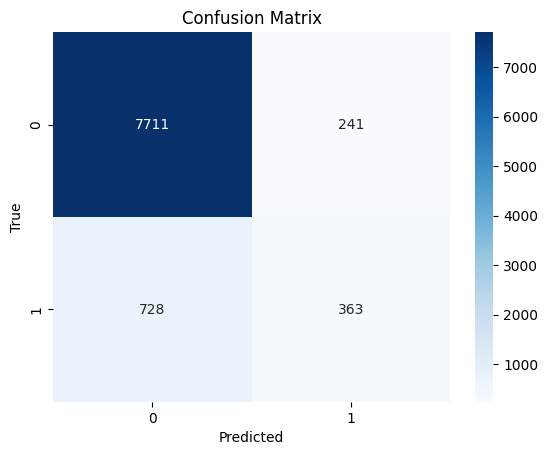

In [17]:
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=model.classes_, yticklabels=model.classes_)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()